In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [5]:
# Выводим количество строк и стролбцов 
print("\nКоличество строк и стролбцов :")
df.shape


Количество строк и стролбцов :


(301355, 5)

Проверяем формат столбцов

In [6]:
# Проверка форматов столбцов
print("\nФормат столбцов:\n")
print(df.dtypes)


Формат столбцов:

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [8]:
# Проверка форматов столбцов после изменения даты
print("\nФормат столбцов:")
print(df.dtypes)


Формат столбцов:
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество продаж')
grouped_df = grouped_df.sort_values('Дата')

Вывести несколько первых строк сгруппированных данных

In [10]:
print(grouped_df.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Нарисуйте график продаж у `grouped_df`

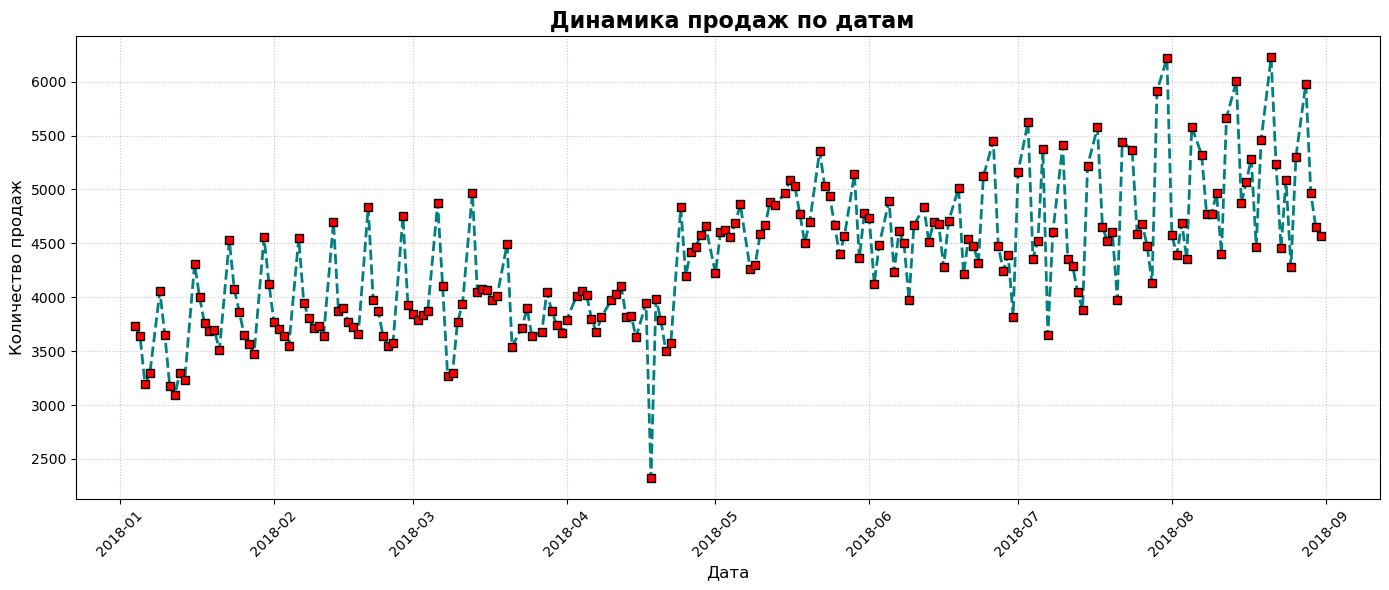

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))  

plt.plot(
    grouped_df['Дата'],
    grouped_df['Количество продаж'],
    color='teal',              # Цвет линии
    linestyle='--',            # Тип линии: пунктир
    linewidth=2,               # Толщина линии
    marker='s',                # Маркер: квадрат
    markerfacecolor='red', # Цвет маркеров
    markeredgecolor='black',  # Обводка маркеров
    markersize=6
)

# Заголовки и подписи
plt.title(' Динамика продаж по датам', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)

# Сетка и форматирование
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

**Общее описание графика**:

На графике представлена **динамика количества продаж по дням** в период с января по август 2018 года. Горизонтальная ось отражает **дату**, вертикальная — **общее количество продаж за день**. Линия на графике пунктирная, с выделением каждой точки (дня) красным квадратом, что позволяет чётко видеть колебания.

**Общий тренд:**
* На всём временном промежутке наблюдается **постепенный рост продаж**.
* Особенно ярко рост заметен **в летние месяцы (июль–август)**.
* Это может быть связано с **сезонным фактором, ростом бизнеса или усилением маркетинга**.

**Колебания и нестабильность:**
* График показывает **постоянные ежедневные колебания** — каждый день отличается от предыдущего.
* Присутствуют **резкие падения**, например, в начале апреля и в конце мая — возможные причины:
  * праздники
  * выходные
  * сбои в поставках
  * технические остановки
* Есть и **отдельные резкие пики** (например, выше 6000 продаж в день) — вероятно, это:
  * акции, распродажи
  * выход новых продуктов
  * корпоративные клиенты или крупные заказы

**Периодичность:**
* График имеет выраженный "зубчатый" характер.
* Это может говорить о **недельной цикличности** — например, в выходные продажи падают, а в будни растут.
* Такая повторяемость может указывать на влияние **внутреннего ритма работы компании или поведения клиентов**.

**Выводы и рекомендации:**

**Продажи растут со временем** — бизнес, скорее всего, развивается.

**Высокая нестабильность и резкие колебания** требуют дополнительного анализа:
  * стоит проверить влияние **дня недели**, **праздников**, **сезона**, **акций**.
    
**Цикличность** указывает на необходимость рассмотреть продажи в разрезе недель и месяцев.

Анализ причин спадов и пиков поможет **оптимизировать работу**, прогнозировать спрос и повышать стабильность.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [13]:
# Квартильные значения
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Условия выброса
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Найдём строку с максимальным значением среди выбросов
max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]

# Выведем строку с максимальным выбросом
print("Строка, у которой максимальный выброс по количеству продаж:")
max_outlier

Строка, у которой максимальный выброс по количеству продаж:


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:

df['Дата'] = pd.to_datetime(df['Дата'])

# Фильтрация по продажам по средам за июнь, июль, август у 3 склада:
filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &     # июнь, июль, август
    (df['Дата'].dt.weekday == 2) &              # среда (0-пн, 1-вт, 2-ср...)
    (df['Склад'] == 3)                          # склад №3
]

# Группируем по товару и считаем общее количество
top_product = (
    filtered
    .groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values(by='Количество', ascending=False)
    .head(1)  # берём топ-1
)

# Вывод
print("Топовый товар по продажам по средам за июнь-июль-август на складе №3:")
top_product

Топовый товар по продажам по средам за июнь-июль-август на складе №3:


,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [34]:
weather_df = pd.read_csv(
    "astana_weather.csv",
    sep=";",
    encoding="utf-8",
    skiprows=6,
    index_col=False  
)


# Проверим, как выглядит таблица
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3.0,12.0,NaN,NaN,NaN,NaN


In [17]:
#Выводит список названий всех столбцов в DataFrame weather_df
print(weather_df.columns)

Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')


In [18]:
#Переименовывает столбцы в таблице weather_df: 'Местное время в Астане' → 'Дата','T' → 'Температура'

weather_df.rename(columns={
    'Местное время в Астане': 'Дата',
    'T': 'Температура'
}, inplace=True)


In [20]:
#проверка качества данных в столбце Дата после переименования:

print("Ошибок в датах:", weather_df['Дата'].isna().sum())
print("Диапазон дат:", weather_df['Дата'].min(), "-", weather_df['Дата'].max())

Ошибок в датах: 0
Диапазон дат: 01.06.2018 02:00 - 31.08.2018 23:00


In [24]:
#преобразование столбца Дата в тип datetime с учётом того, что в данных используется формат "день.месяц.год"
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], errors='coerce', dayfirst=True)

In [26]:
# Группировка по дате без времени
daily_weather = (
    weather_df.groupby(weather_df['Дата'].dt.date)['Температура']
    .mean()
    .reset_index()
)

# Преобразуем обратно в datetime для удобства
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])
daily_weather.rename(columns={'Температура': 'T'}, inplace=True)

In [27]:
daily_weather.head()

,Дата,T
0,2018-06-01,19.975
1,2018-06-02,14.850
2,2018-06-03,9.525
3,2018-06-04,14.475
4,2018-06-05,20.900


In [28]:
#объединим две таблицы по дате
merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='inner')
print(merged_df)

         Дата  Количество продаж        T
0  2018-06-01               4736  19.9750
1  2018-06-02               4124  14.8500
2  2018-06-03               4487   9.5250
3  2018-06-05               4897  20.9000
4  2018-06-06               4235  24.5375
..        ...                ...      ...
74 2018-08-26               5302  11.9750
75 2018-08-28               5983  14.1125
76 2018-08-29               4969  13.8250
77 2018-08-30               4648  14.1750
78 2018-08-31               4570  11.0250

[79 rows x 3 columns]


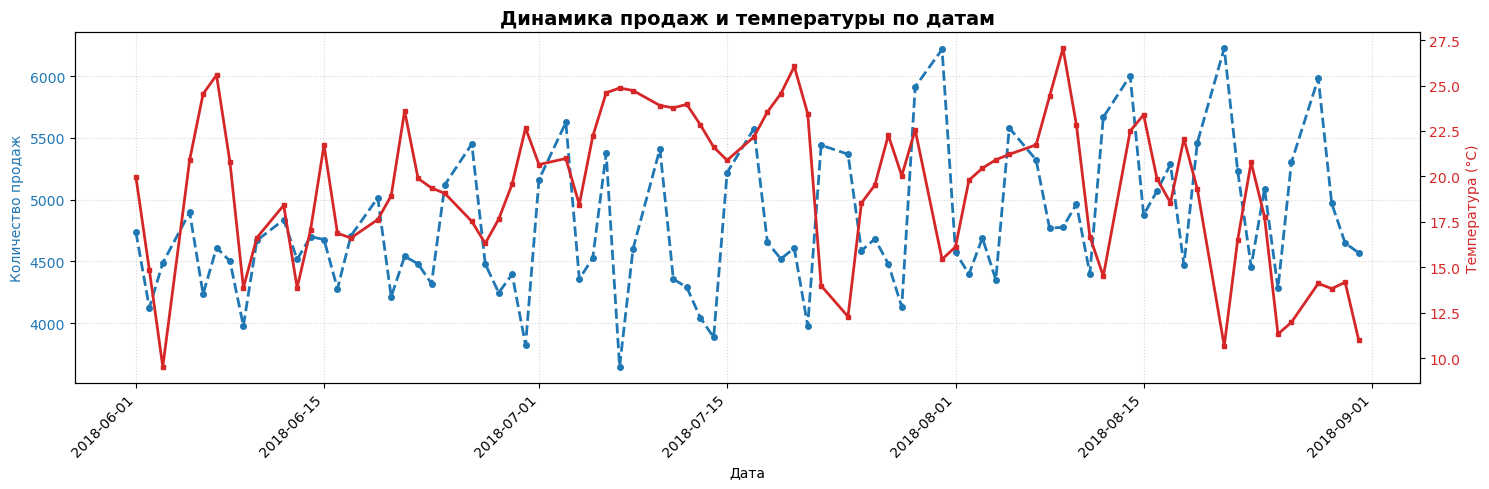

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

# Первая ось — Продажи
color_sales = '#1f77b4'  # Синий
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color=color_sales)
ax1.plot(
    merged_df['Дата'],
    merged_df['Количество продаж'],
    color=color_sales,
    linestyle='--',            # Пунктир
    linewidth=2,
    marker='o',
    markersize=4,
    label='Продажи'
)
ax1.tick_params(axis='y', labelcolor=color_sales)
ax1.grid(True, linestyle=':', alpha=0.5)

# Вторая ось — Температура
ax2 = ax1.twinx()
color_temp = '#d62728'  # Красно-оранжевый
ax2.set_ylabel('Температура (°C)', color=color_temp)
ax2.plot(
    merged_df['Дата'],
    merged_df['T'],
    color=color_temp,
    linestyle='-',
    linewidth=2,
    marker='s',
    markersize=3,
    label='Температура'
)
ax2.tick_params(axis='y', labelcolor=color_temp)

# Заголовок
plt.title('Динамика продаж и температуры по датам', fontsize=14, fontweight='bold')

# Поворот меток по оси X
fig.autofmt_xdate(rotation=45)

# Умный отступ
plt.tight_layout()

# Показываем
plt.show()


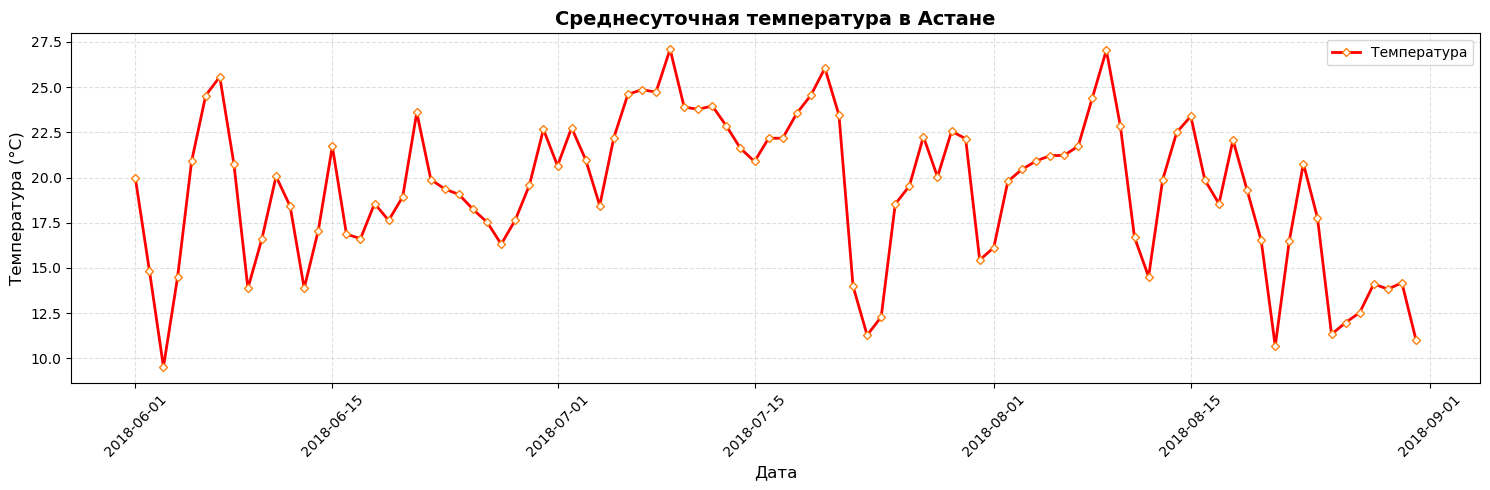

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# График средней температуры
plt.plot(
    daily_weather['Дата'],
    daily_weather['T'],
    color='red',              
    linestyle='-',               # Сплошная линия
    linewidth=2,
    marker='D',                  # Ромб
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='#ff7f0e',
    label='Температура'
)

# Настройки осей и сетки
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Температура (°C)", fontsize=12)
plt.title("Среднесуточная температура в Астане", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)

# Формат оси X
plt.xticks(rotation=45)

# Добавим легенду
plt.legend()

# Автоматическое выравнивание
plt.tight_layout()

# Отображение графика
plt.show()
